In [2]:
#############
###paths#####
#############
import sys
import os

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############
import pickle as pkl
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from equations.class_subcircuit_eq import *
from sklearn.metrics import mean_squared_error


In [3]:
def plotDoseResponse2(inducer,doseResponseRed, doseResponseGreen,semRed, semGreen, pad=0.01, inducerName = '[OC14]'):
    fig,ax = plt.subplots()

    ax.plot(inducer,doseResponseRed,label='RFP', c='red')
    ax.errorbar(inducer,doseResponseRed,yerr=semRed,c='red',fmt='o')
    ax.legend(loc='center left') #upper right
    # ax.ticklabel_format(useOffset=False)
    ax.set_xscale('log')
    ax.set_xlabel(inducerName)
    ax.set_ylim(0,np.amax(doseResponseRed)*1.1)
    ax.set_ylabel('RFP / ($A_{600}$ $RFP_{basal})$')
    ax2=ax.twinx()
    ax2.plot(inducer,doseResponseGreen,label='GFP', c='green')
    ax2.errorbar(inducer,doseResponseGreen,yerr=semGreen,c='green',fmt='o')
    ax2.legend(loc='center right') #upper left
    # ax2.ticklabel_format(useOffset=False)
    ax.set_xscale('log')
    ax2.set_xlabel(inducerName)
    ax2.set_ylim(0,np.amax(doseResponseGreen)*1.1)
    ax2.set_ylabel('GFP / ($A_{600}$ $GFP_{basal})$')

    plt.show()
    
def plotDoseResponsevsData(inducer,inducer_continuous, rfpExp_list, gfpExp_list, semRed, semGreen, doseResponseRed,doseResponseGreen,pad=0.01):
    fig,ax = plt.subplots()

    ax.plot(inducer_continuous,doseResponseRed,label='RFP', c='red')
    ax.scatter(inducer,rfpExp_list, c='red')
    ax.errorbar(inducer,rfpExp_list,yerr=semRed,c='red',fmt='o')
    ax.legend(loc='center left') #upper right
    ax.set_ylabel('RFP / ($A_{600}$ $RFP_{basal})$')
    ax.set_xscale('log')


    ax2=ax.twinx()
    ax2.plot(inducer_continuous,doseResponseGreen,label='GFP', c='green')
    ax2.scatter(inducer,gfpExp_list, c='green')
    ax2.errorbar(inducer,gfpExp_list,yerr=semGreen,c='green',fmt='o')
    ax2.legend(loc='center right') #upper left
    ax2.set_ylabel('GFP / ($A_{600}$ $GFP_{basal})$')
    ax.set_xscale('log')


    plt.show()

def plotDoseResponse(inducer_list, U_ss, color='k'):
    plt.plot(inducer_list,U_ss, c=color)
    plt.xlabel('[inducer]')
    plt.ylabel('Fluorescence')
    plt.xscale('log')
    plt.show()

def doseResponse(subcircuit, inducer_list, initial_conditions=[10,10]):
    U_ss = []
    T=1000
    t = np.linspace(0, T, T*50)
    for inducer in inducer_list:
        sol = odeint(subcircuit.ddt, initial_conditions, t, args=(inducer,inducer))
        Ustar_ODE=sol[-1]
        U_ss.append(sol[-1])
    return np.array(U_ss)

## Subcircuit 3

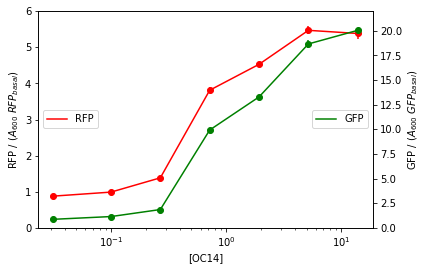

In [4]:
doseResponseExp = pkl.load(open('input/subcircuit3_circuit14_doseResponse.pkl','rb'))
OC14_list = doseResponseExp['OC14_list']; gfpExp_list = doseResponseExp['doseResponse_gfp']; rfpExp_list = doseResponseExp['doseResponse_rfp']
semRed = doseResponseExp['doseResponse_rfp_sem']; semGreen = doseResponseExp['doseResponse_gfp_sem']


plotDoseResponse2(OC14_list, rfpExp_list, gfpExp_list, semRed, semGreen)


In [5]:

# Specify name of circuit and variant investigated
circuit_n='circuit14'
variant='1nd'
# Specifiy number of parameter sets in parameterset file to be loaded
n_param_sets = 1000000

print(f'Circuit:{circuit_n}, Variant:{variant}')

df_full= pkl.load( open(modellingpath + "/3954/paper/input/balanced_parameterfiles/df_%s_variant%s_%rparametersets_balanced.pkl"%(circuit_n,variant,n_param_sets), "rb"))
df = df_full[['VC','VD','VE','muLVA','Kda','Kbd','Kce','Kee', 'nda','nbd','nce','nee']]
df_balanced = df_full[df_full['balance'] == 'Balanced']
df_balanced = df_balanced[['VC','VD','VE','muLVA','Kda','Kbd','Kce','Kee', 'nda','nbd','nce','nee',]]

df_balanced

Circuit:circuit14, Variant:1nd


,VC,VD,VE,muLVA,Kda,Kbd,Kce,Kee,nda,nbd,nce,nee
0,19.177823,47.425968,98.603756,3.394454,30.246197,3.950182,4.278198,0.01,1.0,2.0,1.0,4.0
1,304.345002,135.452353,155.554552,3.414466,48.591258,16.006643,3.569417,0.01,1.0,2.0,1.0,4.0
2,348.703942,475.522215,41.532850,3.938688,6.484979,4.455242,1.720599,0.01,1.0,2.0,1.0,4.0
3,154.001815,63.448029,267.681731,3.228803,34.344444,3.996837,1.626064,0.01,1.0,2.0,1.0,4.0
4,694.379864,350.477990,87.049174,3.310359,44.820783,9.380993,1.328727,0.01,1.0,2.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,743.197069,182.621554,959.542199,3.878041,2.685110,230.128112,16.207506,0.01,1.0,2.0,1.0,4.0
999996,758.420601,332.519335,388.291530,4.300639,80.385326,93.888140,18.624748,0.01,1.0,2.0,1.0,4.0
999997,77.261856,22.972700,33.243426,3.529508,8.978784,35.031485,18.022831,0.01,1.0,2.0,1.0,4.0
999998,369.248901,45.690058,289.991435,4.223485,27.775923,2.607937,26.584930,0.01,1.0,2.0,1.0,4.0


In [6]:
subcircuit = lambda x: subcircuit3_circuit14(x)


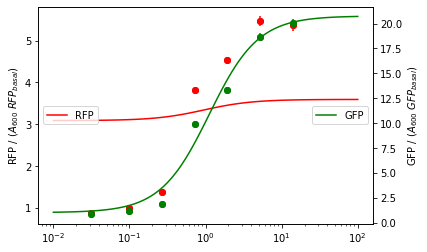

pardict1 {'VC': 15.594204396816703, 'VD': 19.755150149643036, 'VE': 5.0, 'muLVA': 3.7138908126126493, 'Kda': 34.56890386091548, 'Kbd': 1.1191357058674585, 'Kce': 11.590250386884874, 'Kee': 0.009999999999999998, 'nda': 1.0, 'nbd': 1.354193850760738, 'nce': 1.0, 'nee': 4.0}
The maximum number of function evaluations is exceeded.
Function evaluations 10, initial cost 3.3377e-01, final cost 4.1602e-02, first-order optimality 2.92e-02.
pardict1 {'VC': 15.594204396816703, 'VD': 19.755150149643036, 'VE': 5.0, 'muLVA': 3.7138908126126493, 'Kda': 34.56890386091548, 'Kbd': 1.1191357058674585, 'Kce': 11.590250386884874, 'Kee': 0.009999999999999998, 'nda': 1.0, 'nbd': 1.354193850760738, 'nce': 1.0, 'nee': 4.0}


pardict_final {'VC': 15.616585668355336, 'VD': 19.895231961863697, 'VE': 5.448445709024805, 'muLVA': 3.7138907197567197, 'Kda': 34.48367752411421, 'Kbd': 0.8923048257282783, 'Kce': 11.590498984165144, 'Kee': 0.010000396539774397, 'nda': 0.7496365474133908, 'nbd': 2.090256106347254, 'nce': 

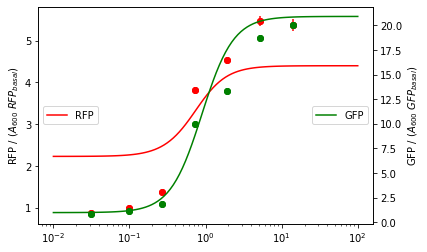

In [8]:
from scipy.optimize import least_squares
def residualDoseResponse(pars, n_species=3):
    par_dict2_data = df_balanced.iloc[0].to_dict()
    par_dict1 = {}
    for count,key in enumerate(par_dict2_data.keys()):
        par_dict1[key] = pars[count]

    U_ss1= doseResponse(subcircuit(par_dict1), OC14_list, initial_conditions=[10]*n_species)[:,:2]#ONLY TAKE RED AND GREEN FOR FITTING

    data = np.array([rfpExp_list, gfpExp_list]).T
    mean_list = [np.mean(data[:,x]) for x in range(2)]

    relError = [np.sum(np.square(data - U_ss1)[:,x])/np.sum(np.square(data[:,x] - mean_list[x])) for x in range(2)]

    return relError

n_species=3
OC14_list_continuous = np.logspace(2,-2, 100)

par_dict = df_balanced.iloc[7].to_dict()


par_dict['VE'] = 5
par_dict['VD'] = 20
par_dict =  {'VC': 15.594204396816703, 'VD': 19.755150149643036, 'VE': 5.0, 'muLVA': 3.7138908126126493, 'Kda': 34.56890386091548, 'Kbd': 1.1191357058674585, 'Kce': 11.590250386884874, 'Kee': 0.009999999999999998, 'nda': 1.0, 'nbd': 1.354193850760738, 'nce': 1.0, 'nee': 4.0}
U_ss= doseResponse(subcircuit(par_dict), OC14_list_continuous, initial_conditions=[10]*n_species)
plotDoseResponsevsData(OC14_list,OC14_list_continuous,rfpExp_list,gfpExp_list,semRed, semGreen,  U_ss[:,0] ,U_ss[:,1] )

print('pardict1', par_dict)
pars = [x for x in par_dict.values()]
r = least_squares(residualDoseResponse,pars, max_nfev=10 , verbose=1)
x = r['x']
new_par_dict = {}
for count,key in enumerate(par_dict.keys()):
    new_par_dict[key] = x[count]
print('pardict1', par_dict)
print('')
print('')

print('pardict_final', new_par_dict)
print('')

U_ss= doseResponse(subcircuit(new_par_dict), OC14_list_continuous, initial_conditions=[10]*3)
# plotDoseResponsevsData(OC14_list,OC14_list_continuous,gfpExp_list,gfpExp_list,semGreen, semGreen,  U_ss[:,1] ,U_ss[:,1] )
plotDoseResponsevsData(OC14_list,OC14_list_continuous,rfpExp_list,gfpExp_list,semRed, semGreen,  U_ss[:,0] ,U_ss[:,1] )
# plotDoseResponsevsData(AHL_list,A_list,gfpExp_list,gfpExp_list,semGreen, semGreen,  U_ss[:,1] ,U_ss[:,1] )


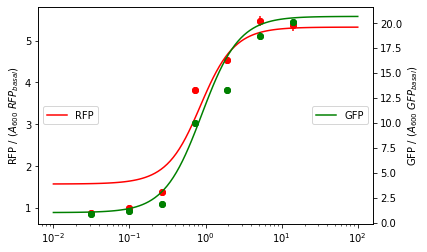

In [ ]:
plotDoseResponsevsData(OC14_list,OC14_list_continuous,rfpExp_list,gfpExp_list,semRed, semGreen,  U_ss[:,0] ,U_ss[:,1] )


## Subcircuit 1

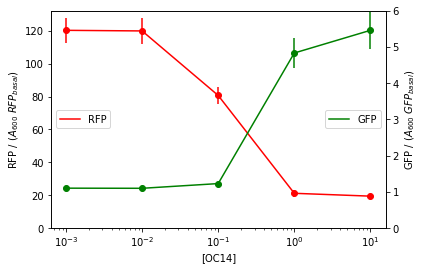

array([1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03])

In [9]:
doseResponseExp = pkl.load(open('input/subcircuit1_circuit14_doseResponse_maxATC.pkl','rb'))
AHL_list = doseResponseExp['AHL_list']; gfpExp_list = doseResponseExp['maxATC_doseResponse_gfp']; rfpExp_list = doseResponseExp['maxATC_doseResponse_rfp']
semRed = doseResponseExp['maxATC_doseResponse_rfp_sem']; semGreen = doseResponseExp['maxATC_doseResponse_gfp_sem']


plotDoseResponse2(AHL_list, rfpExp_list, gfpExp_list, semRed, semGreen)
AHL_list

Step 1: load parameter distributions (prior)


In [10]:

# Specify name of circuit and variant investigated
circuit_n='circuit14'
variant='1nd'
# Specifiy number of parameter sets in parameterset file to be loaded
n_param_sets = 1000000

print(f'Circuit:{circuit_n}, Variant:{variant}')

df_full= pkl.load( open(modellingpath + "/3954/paper/input/balanced_parameterfiles/df_%s_variant%s_%rparametersets_balanced.pkl"%(circuit_n,variant,n_param_sets), "rb"))
df = df_full[['VE','VF','muLVA','Kbd','Kfe','Kee','nbd','nfe','nee','Kee']]
df_balanced = df_full[df_full['balance'] == 'Balanced']
df_balanced = df_balanced[['VE','VF','muLVA','Kbd','Kfe','Kee','nbd','nfe','nee','Kee']]

df_balanced

Circuit:circuit14, Variant:1nd


,VE,VF,muLVA,Kbd,Kfe,Kee,nbd,nfe,nee,Kee
0,98.603756,702.461106,3.394454,3.950182,163.978807,0.01,2.0,4.0,4.0,0.01
1,155.554552,999.253725,3.414466,16.006643,5.421244,0.01,2.0,4.0,4.0,0.01
2,41.532850,301.720176,3.938688,4.455242,177.921211,0.01,2.0,4.0,4.0,0.01
3,267.681731,281.612052,3.228803,3.996837,160.291891,0.01,2.0,4.0,4.0,0.01
4,87.049174,444.717315,3.310359,9.380993,3.794104,0.01,2.0,4.0,4.0,0.01
...,...,...,...,...,...,...,...,...,...,...
999995,959.542199,327.439791,3.878041,230.128112,318.746343,0.01,2.0,4.0,4.0,0.01
999996,388.291530,321.379872,4.300639,93.888140,8.147470,0.01,2.0,4.0,4.0,0.01
999997,33.243426,22.027648,3.529508,35.031485,4.000563,0.01,2.0,4.0,4.0,0.01
999998,289.991435,52.842083,4.223485,2.607937,3.752162,0.01,2.0,4.0,4.0,0.01


In [11]:
subcircuit = lambda x: subcircuit1_circuit14(x)

# par_dict['VE'] = pars[0]

Step 2: Sample from prior


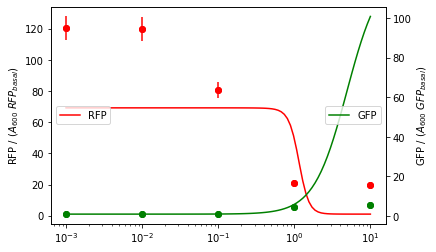

The maximum number of function evaluations is exceeded.
Function evaluations 10, initial cost 1.0964e+05, final cost 3.8154e+04, first-order optimality 1.49e+04.
pardict1 {'VE': 68.22476437572783, 'VF': 123.92968368157253, 'muLVA': 3.7138908126126493, 'Kbd': 4.912576206836341, 'Kfe': 7.408820665516073, 'Kee': 0.009999999999999998, 'nbd': 2.0, 'nfe': 4.0, 'nee': 4.0}


pardict_final {'VE': 68.2247654590626, 'VF': 123.8129798555196, 'muLVA': 3.7138908126126315, 'Kbd': 5.943951471526379, 'Kfe': 7.40882182078922, 'Kee': 0.009999999999933768, 'nbd': 0.5985218167894542, 'nfe': 4.000000286272399, 'nee': 4.0}



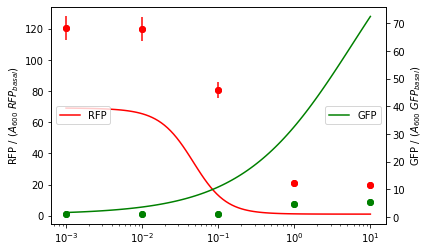

In [12]:
from scipy.optimize import least_squares

samples = np.zeros((10000,2))
params_samples = np.zeros((10000,9))
index_arr = np.zeros(1)
def residualDoseResponse(pars, samples, params_samples, index_arr):
    par_dict2_data = df_balanced.iloc[0].to_dict()
    par_dict1 = {}
    for count,key in enumerate(par_dict2_data.keys()):
        par_dict1[key] = pars[count]

    U_ss1= doseResponse(subcircuit(par_dict1), AHL_list)
    data = np.array([rfpExp_list, gfpExp_list]).T
    sem = np.array([semRed, semGreen])
    mean_list = [np.mean(data[:,x]) for x in range(2)]

    relError = [np.sum(np.square(data - U_ss1)[:,x])/np.sum(np.square(data[:,x] - mean_list[x])) for x in range(2)]
    index = int(index_arr[0])
    samples[index,:] = relError
    params_samples[index, :] = pars
    index_arr[0] += 1
    return relError


OC14_list = np.logspace(-3,1, 100)

par_dict = df_balanced.iloc[7].to_dict()


U_ss= doseResponse(subcircuit(par_dict), OC14_list)
plotDoseResponsevsData(AHL_list,OC14_list,rfpExp_list,gfpExp_list,semRed, semGreen,  U_ss[:,0] ,U_ss[:,1] )
# plotDoseResponsevsData(AHL_list,A_list,gfpExp_list,gfpExp_list,semGreen, semGreen,  U_ss[:,1] ,U_ss[:,1] )


pars = [x for x in par_dict.values()]
r = least_squares(residualDoseResponse,pars, max_nfev=10 , verbose=1, args=(samples, params_samples, index_arr))
x = r['x']
new_par_dict = {}
for count,key in enumerate(par_dict.keys()):
    new_par_dict[key] = x[count]
print('pardict1', par_dict)
print('')
print('')

print('pardict_final', new_par_dict)
print('')

U_ss= doseResponse(subcircuit(new_par_dict), OC14_list)
plotDoseResponsevsData(AHL_list,OC14_list,rfpExp_list,gfpExp_list,semRed, semGreen,  U_ss[:,0] ,U_ss[:,1] )
# plotDoseResponsevsData(AHL_list,A_list,gfpExp_list,gfpExp_list,semGreen, semGreen,  U_ss[:,1] ,U_ss[:,1] )


In [22]:
from numpy import diff# plt.scatter(params_samples[:int(index_arr[0]),0],samples[:int(index_arr[0]),0])
p1 =  params_samples[:int(index_arr[0]),0]
p2 =  params_samples[:int(index_arr[0]),2]
l = samples[:int(index_arr[0]),0]
dy = diff(l)/diff(p1)

# plt.scatter(params_samples[:int(index_arr[0]),1], samples[:int(index_arr[0]),0])

# plt.yscale('log')

NameError: name 'diff' is not defined

In [ ]:
import pandas as pd
r_df = pd.read_csv('r.csv')
plt.plot(r_df['Iteration'],r_df['Cost'] , c = 'darkslategrey', label='Cost')
plt.plot(r_df['Iteration'],r_df['Cost Reduction'],  c = 'lightseagreen',label='Cost Reduction')
plt.yscale('log')
plt.legend()
